In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AReyH/LoL_Dataset/master/high_diamond_ranked_10min.csv")
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [35]:
cols = ['gameId', 'blueWardsPlaced', 'blueWardsDestroyed',
        'blueDeaths', 
       'blueEliteMonsters', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redDeaths',
       'redEliteMonsters', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redGoldPerMin']
df1 = df.copy()
df1 = df1.drop(cols, axis=1)

In [36]:
df1.head()

,blueWins,blueFirstBlood,blueKills,blueAssists,blueDragons,blueCSPerMin,redKills,redAssists,redDragons,redCSPerMin
0,0,1,9,11,0,19.5,6,8,0,19.7
1,0,0,5,5,0,17.4,5,2,1,24.0
2,0,0,7,4,1,18.6,11,14,0,20.3
3,0,0,4,5,0,20.1,5,10,0,23.5
4,0,0,6,6,0,21.0,6,7,1,22.5


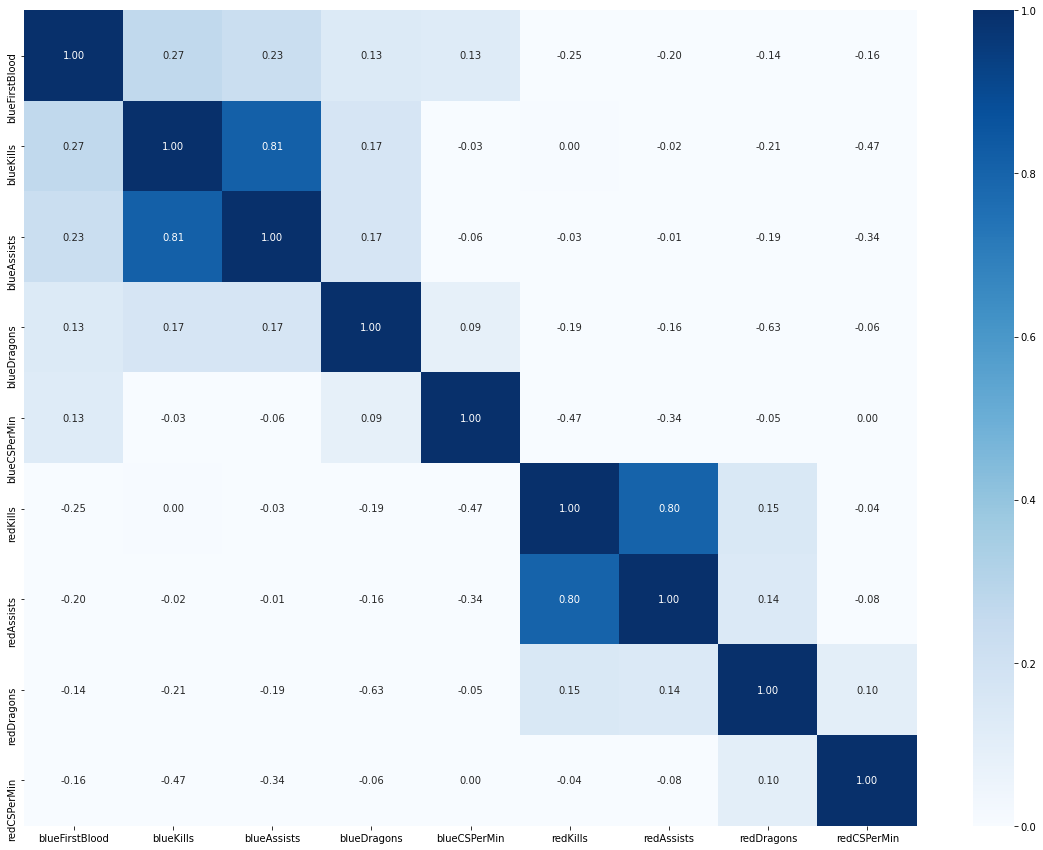

In [37]:
def heat_map(data):
    plt.figure(figsize=(20,15))
    sns.heatmap(data.drop('blueWins', axis=1).corr(), cmap='Blues',annot=True,fmt='.2f',vmin=0)
heat_map(df1)

In [40]:
corr_list = df1[df1.columns[1:]].apply(lambda x: x.corr(df1['blueWins']))
cols__=[]
# This appends the columns that have a correlation bigger than 0.2, and less than 0.2
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols__.append(col)
df3 = df1[cols__]

In [41]:
df3.head()

,blueFirstBlood,blueKills,blueAssists,blueDragons,blueCSPerMin,redKills,redAssists,redDragons,redCSPerMin
0,1,9,11,0,19.5,6,8,0,19.7
1,0,5,5,0,17.4,5,2,1,24.0
2,0,7,4,1,18.6,11,14,0,20.3
3,0,4,5,0,20.1,5,10,0,23.5
4,0,6,6,0,21.0,6,7,1,22.5


In [42]:
X = df3
y = df['blueWins']


In [43]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
scaler_filename = "scaler1.save"
joblib.dump(scaler, scaler_filename) 

['scaler1.save']

Hyperparameter Tuning (Scikit Learn Wrapper)

In [46]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [49]:
def c_model():
  model = Sequential()
  model.add(Dense(256,activation='relu', input_shape=(9,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=c_model, epochs=10,batch_size=64)

In [50]:
model.fit(X_train,y_train,batch_size=64,validation_split=0.1, epochs=20,verbose=2)

Epoch 1/20
112/112 - 0s - loss: 0.5896 - accuracy: 0.6888 - val_loss: 0.5603 - val_accuracy: 0.7029
Epoch 2/20
112/112 - 0s - loss: 0.5682 - accuracy: 0.7036 - val_loss: 0.6017 - val_accuracy: 0.6713
Epoch 3/20
112/112 - 0s - loss: 0.5641 - accuracy: 0.7105 - val_loss: 0.5464 - val_accuracy: 0.7118
Epoch 4/20
112/112 - 0s - loss: 0.5597 - accuracy: 0.7092 - val_loss: 0.5672 - val_accuracy: 0.6890
Epoch 5/20
112/112 - 0s - loss: 0.5578 - accuracy: 0.7068 - val_loss: 0.5547 - val_accuracy: 0.7257
Epoch 6/20
112/112 - 0s - loss: 0.5580 - accuracy: 0.7168 - val_loss: 0.5546 - val_accuracy: 0.7193
Epoch 7/20
112/112 - 0s - loss: 0.5563 - accuracy: 0.7181 - val_loss: 0.5441 - val_accuracy: 0.7231
Epoch 8/20
112/112 - 0s - loss: 0.5560 - accuracy: 0.7147 - val_loss: 0.5417 - val_accuracy: 0.7219
Epoch 9/20
112/112 - 0s - loss: 0.5545 - accuracy: 0.7147 - val_loss: 0.5592 - val_accuracy: 0.6979
Epoch 10/20
112/112 - 0s - loss: 0.5544 - accuracy: 0.7146 - val_loss: 0.5406 - val_accuracy: 0.7080

Parameter Tuning using GridSearchCV

batch_sizes, epochs

In [51]:
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=c_model)

batch_sizes = [10,20,50,100]
epochs = [5,10,50]
parameters = {'batch_size': batch_sizes, 'epochs': epochs}
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)

Epoch 1/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5851 - accuracy: 0.6920
Epoch 2/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5639 - accuracy: 0.7067
Epoch 3/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5608 - accuracy: 0.7140
Epoch 4/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5580 - accuracy: 0.7139
Epoch 5/5
159/159 [==============================] - 0s 911us/step - loss: 0.6023 - accuracy: 0.6850
Epoch 1/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5873 - accuracy: 0.6854
Epoch 2/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5673 - accuracy: 0.7067
Epoch 3/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5662 - accuracy: 0.7096
Epoch 4/5
633/633 [==============================] - 1s 1ms/step - loss: 0.5635 - accuracy: 0.7118
Epoch 5/5
159/159 [==============================] - 0s 841us/step - loss: 0.5763 - accuracy: 0.6894
Epoch 

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f729c6cfd68>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20, 50, 100],
                         'epochs': [5, 10, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parameter in zip(means,parameters):
  print(mean,parameter)

0.7135278820991516 {'batch_size': 10, 'epochs': 10}
0.7002442002296447 {'batch_size': 10, 'epochs': 5}
0.7135278820991516 {'batch_size': 10, 'epochs': 10}
0.7099838256835938 {'batch_size': 10, 'epochs': 50}
0.704163920879364 {'batch_size': 20, 'epochs': 5}
0.7107437968254089 {'batch_size': 20, 'epochs': 10}
0.7017603039741516 {'batch_size': 20, 'epochs': 50}
0.7070751547813415 {'batch_size': 50, 'epochs': 5}
0.7111239552497863 {'batch_size': 50, 'epochs': 10}
0.7118828177452088 {'batch_size': 50, 'epochs': 50}
0.6942956328392029 {'batch_size': 100, 'epochs': 5}
0.6988533139228821 {'batch_size': 100, 'epochs': 10}
0.7047959566116333 {'batch_size': 100, 'epochs': 50}


Tuning Optimizers

In [54]:
def c_model(optimizer):
  model = Sequential()
  model.add(Dense(256,activation='relu', input_shape=(9,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=c_model, epochs=10,batch_size=50)
parameters = {'optimizer':['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)

Epoch 1/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5611
Epoch 2/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6356
Epoch 3/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.6381
Epoch 4/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6416
Epoch 5/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.6427
Epoch 6/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6561
Epoch 7/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.6626
Epoch 8/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.6680
Epoch 9/10
127/127 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.6787
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.6622
E

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f729c69b9e8>,
             iid='deprecated', n_jobs=None,
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                                       'Adam', 'Adamax', 'Nadam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parameter in zip(means,parameters):
  print(mean,parameter)

0.7160585045814514 {'optimizer': 'RMSprop'}
0.6826552629470826 {'optimizer': 'SGD'}
0.7160585045814514 {'optimizer': 'RMSprop'}
0.6349528074264527 {'optimizer': 'Adagrad'}
0.5538443803787232 {'optimizer': 'Adadelta'}
0.7098600625991821 {'optimizer': 'Adam'}
0.7112512588500977 {'optimizer': 'Adamax'}
0.7125162005424499 {'optimizer': 'Nadam'}


Tuning activation function

In [58]:
def c_model(activation):
  model = Sequential()
  model.add(Dense(256,activation=activation, input_shape=(9,)))
  model.add(Dense(128,activation=activation))
  model.add(Dense(64,activation=activation))
  #model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=c_model, epochs=10,batch_size=50)
parameters = {'activation':['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid','linear']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)

Epoch 1/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4964
Epoch 2/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4926
Epoch 3/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5021
Epoch 4/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 5/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5021
Epoch 6/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 7/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 8/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 9/10
127/127 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4954
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5009
E

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f728a0a5908>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['softmax', 'softplus', 'softsign',
                                        'relu', 'tanh', 'sigmoid',
                                        'hard_sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parameter in zip(means,parameters):
  print(mean,parameter)

0.7160587430000305 {'activation': 'softsign'}
0.4972790002822876 {'activation': 'softmax'}
0.6872058987617493 {'activation': 'softplus'}
0.7160587430000305 {'activation': 'softsign'}
0.7142873883247376 {'activation': 'relu'}
0.7117571115493775 {'activation': 'tanh'}
0.6863220572471619 {'activation': 'sigmoid'}
0.6918930411338806 {'activation': 'hard_sigmoid'}
0.7079617977142334 {'activation': 'linear'}


Best model

In [85]:
model = Sequential()
model.add(Dense(256,activation='tanh', input_shape=(9,)))
model.add(Dense(128,activation='tanh'))
model.add(Dense(64,activation='tanh'))
#model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=50,validation_split=0.3, epochs=100,verbose=2)


Epoch 1/100
111/111 - 0s - loss: 0.5840 - accuracy: 0.6882 - val_loss: 0.5483 - val_accuracy: 0.7183
Epoch 2/100
111/111 - 0s - loss: 0.5663 - accuracy: 0.7021 - val_loss: 0.5488 - val_accuracy: 0.7145
Epoch 3/100
111/111 - 0s - loss: 0.5590 - accuracy: 0.7093 - val_loss: 0.5457 - val_accuracy: 0.7153
Epoch 4/100
111/111 - 0s - loss: 0.5590 - accuracy: 0.7151 - val_loss: 0.5451 - val_accuracy: 0.7153
Epoch 5/100
111/111 - 0s - loss: 0.5583 - accuracy: 0.7088 - val_loss: 0.5471 - val_accuracy: 0.7162
Epoch 6/100
111/111 - 0s - loss: 0.5585 - accuracy: 0.7097 - val_loss: 0.5560 - val_accuracy: 0.7153
Epoch 7/100
111/111 - 0s - loss: 0.5592 - accuracy: 0.7113 - val_loss: 0.5455 - val_accuracy: 0.7128
Epoch 8/100
111/111 - 0s - loss: 0.5564 - accuracy: 0.7146 - val_loss: 0.5482 - val_accuracy: 0.7119
Epoch 9/100
111/111 - 0s - loss: 0.5548 - accuracy: 0.7144 - val_loss: 0.5461 - val_accuracy: 0.7183
Epoch 10/100
111/111 - 0s - loss: 0.5568 - accuracy: 0.7110 - val_loss: 0.5496 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


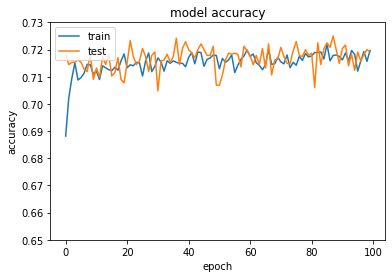

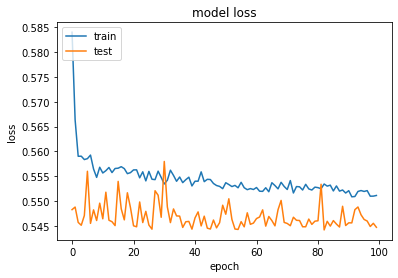

In [86]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.65,0.73)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.ylim(0.6,0.75)
plt.show()

In [87]:
predictions = model.predict(X_test)
rounded_predictions = []
for i in predictions:
  rounded_predictions.append(int(np.round(i)))

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [88]:
def plot_confusion_matrix(cm,classes, normalize=False, title="Confusion Matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without normalization")
  print(cm)

  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j], horizontalalignment="center",color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

Confusion Matrix, without normalization
[[739 244]
 [290 703]]


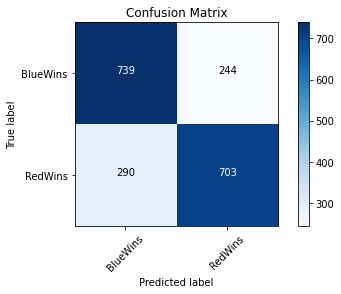

In [89]:
cm_plot_labels = ["BlueWins","RedWins"] 
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")

In [90]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [91]:
path = F"/content/gdrive/My Drive/LoLSt.h5"

In [92]:
tf.keras.models.save_model(model,"LoLSt.h5")